# I . Perkenalan

Nama : Arya Bandoro

FTDS Batch - 004

# II. Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly as plot
import plotly.express as px
import seaborn as sns
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import re
print("Tensorflow Version",tf.__version__)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

Tensorflow Version 2.6.0


# III. Data Loading

Pertama bisa kita load datanya

In [3]:
data_awal = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
data_awal.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Selanjutnya lakukan eksplorasi sederhana

In [4]:
data_awal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
data_awal.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

Tidak Ada Missing Value

# IV. Data Cleaning

Selanjutnya bisa kita lakukan data cleaning, dan pertama kita ganti nama dari kolom dulu

In [6]:
data_awal.columns = ['Sentimen', 'ID', 'Tanggal', 'Query', 'User_ID', 'Text']

In [7]:
data_awal

,Sentimen,ID,Tanggal,Query,User_ID,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Selanjutnya hapus kolom yang tidak dipakai

In [8]:
data_fix = data_awal.drop(['ID', 'Tanggal', 'Query', 'User_ID'], axis=1)

In [9]:
data_fix

,Sentimen,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


# V. EDA & Preprocessing

In [10]:
data_fix['Sentimen'].value_counts()

0    800000
4    800000
Name: Sentimen, dtype: int64

Selanjutnya kita lakukan perubahan informasi numerik menjadi linguistik

In [11]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
data_fix['Sentimen'] = data_fix['Sentimen'].apply(lambda x: label_decoder(x))
data_fix.head()

,Sentimen,Text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Kita Cek Persebaran Datanya

Text(0.5, 1.0, 'Distribusi Persebaran Sentimen')

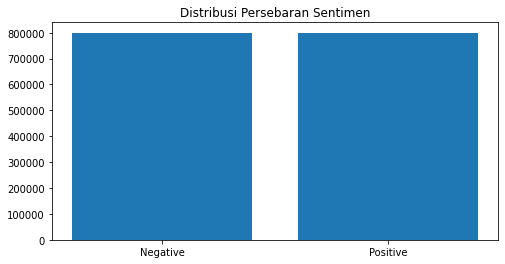

In [12]:
val_count = data_fix['Sentimen'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Distribusi Persebaran Sentimen")

Datanya tersebar cukup merata, dan kita lanjutkan dengan menghilangkan tanda baca

In [13]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [14]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [15]:
data_fix['Text'] = data_fix['Text'].apply(lambda x: preprocess(x))

Selanjutnya Kita lakukan visualisasi dengan wordcloud

Positif

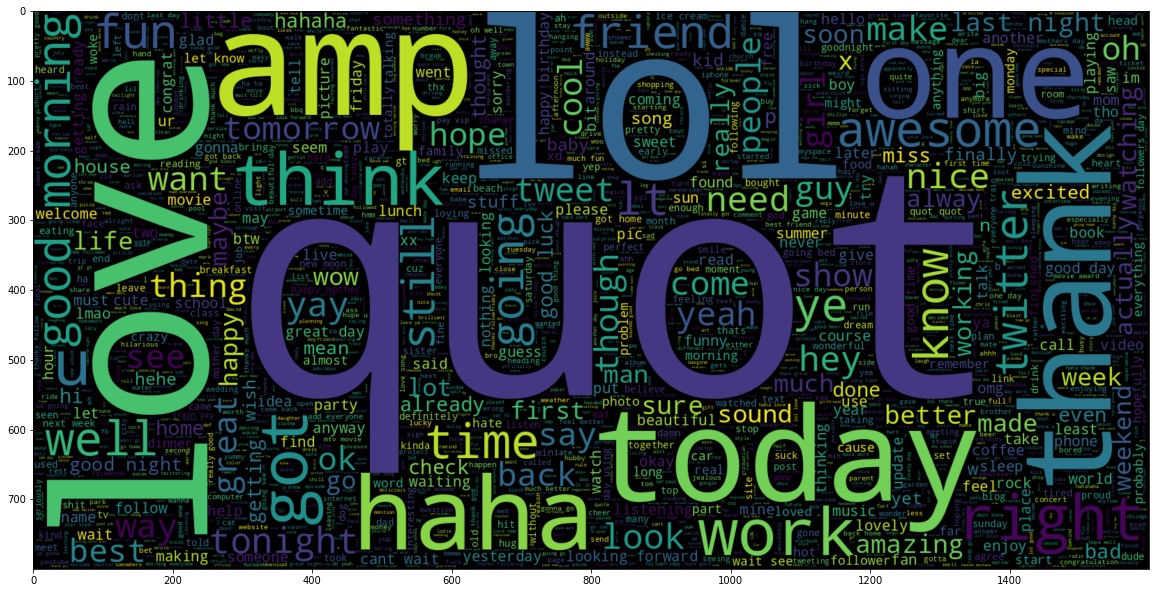

In [16]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data_fix[data_fix['Sentimen'] == 'Positive'].Text))
plt.imshow(wc , interpolation = 'bilinear') 

Negatif

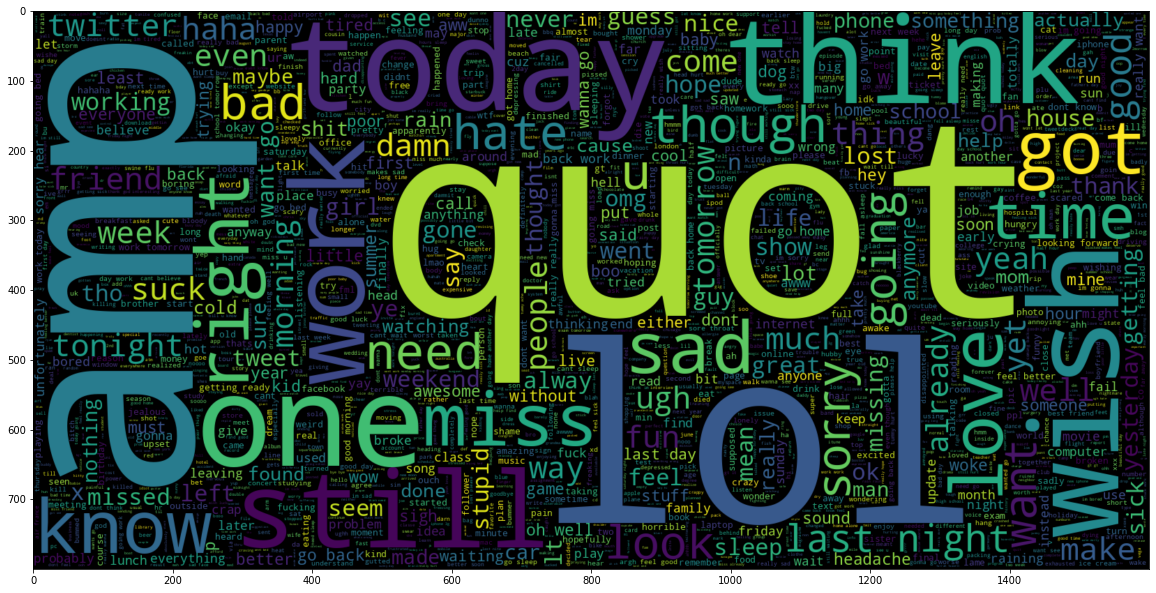

In [17]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data_fix[data_fix['Sentimen'] == 'Negative'].Text))
plt.imshow(wc , interpolation = 'bilinear') 

# VI. Model Definition & Training

In [18]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

Pipeline

In [19]:
dataset = tf.data.Dataset.from_tensors(data_fix)

2021-12-01 10:55:52.231037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 10:55:52.232162: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 10:55:52.232872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 10:55:52.235734: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
train_data, test_data = train_test_split(data_fix, test_size=1-TRAIN_SIZE,random_state=7)

Kita coba cek datanya karena dikhawatirkan terjadi overfitting

In [21]:
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.Text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290575


In [23]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(train_data.Text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (1280000, 30)


In [24]:
labels = train_data.Sentimen.unique().tolist()

Selanjutnya dapat kita lakukan label encoding

In [25]:
encoder = LabelEncoder()
encoder.fit(train_data.Sentimen.to_list())

y_train = encoder.transform(train_data.Sentimen.to_list())
y_test = encoder.transform(test_data.Sentimen.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


y_train shape: (1280000, 1)
y_test shape: (320000, 1)


Selanjutnya dapat kita lakukan word embedding

In [26]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-12-01 10:57:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-12-01 10:57:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-01 10:57:06--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [27]:
GLOVE_EMB = '/kaggle/working/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [28]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [29]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [30]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

# VII. Model Build

Selanjutnya kita buat konstruksi modelnya

In [31]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

Lalu dapat langsung kita compile

In [32]:
model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

Kita cek apakah di jalankan di GPU atau CPU

In [33]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on GPU...


2021-12-01 11:02:06.436946: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 11:02:06.437504: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 11:02:06.437911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 11:02:06.438322: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 11:02:06.438678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Selanjutnya dapat dilakukan fitting model

In [34]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test[0:320000], y_test), callbacks=[ReduceLROnPlateau])

2021-12-01 11:02:07.453466: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-12-01 11:02:11.435059: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1250/1250 [==============================] - 141s 106ms/step - loss: 0.5198 - accuracy: 0.7391 - val_loss: 1.0092 - val_accuracy: 0.4997
Epoch 2/10
1250/1250 [==============================] - 134s 107ms/step - loss: 0.4878 - accuracy: 0.7622 - val_loss: 0.9904 - val_accuracy: 0.4994
Epoch 3/10
1250/1250 [==============================] - 134s 107ms/step - loss: 0.4771 - accuracy: 0.7686 - val_loss: 1.0390 - val_accuracy: 0.4994
Epoch 4/10
1250/1250 [==============================] - 135s 108ms/step - loss: 0.4708 - accuracy: 0.7735 - val_loss: 1.0855 - val_accuracy: 0.5000
Epoch 5/10
1250/1250 [==============================] - 134s 107ms/step - loss: 0.4663 - accuracy: 0.7761 - val_loss: 1.1050 - val_accuracy: 0.4999
Epoch 6/10
1250/1250 [==============================] - 135s 108ms/step - loss: 0.4627 - accuracy: 0.7783 - val_loss: 1.1441 - val_accuracy: 0.5001
Epoch 7/10
1250/1250 [==============================] - 136s 109ms/step - loss: 0.4601 - accuracy: 0.7800 - val_loss: 1.154

# VIII. Model Evaluation

Selanjutnya kita cek akurasi dari modelnya

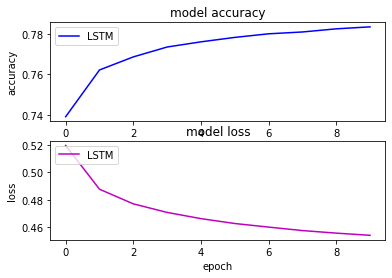

In [35]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['LSTM'], loc = 'upper left')



In [36]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# IX. Model Optimization

Kita coba tidak menggunakan dropout, dengan cara sebagai berikut ini

In [37]:
sequence_input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences2 = embedding_layer(sequence_input2)
x1 = SpatialDropout1D(0.2)(embedding_sequences2)
x1 = Conv1D(64, 5, activation='relu')(x1)
x1 = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dense(512, activation='relu')(x1)
outputs2 = Dense(1, activation='sigmoid')(x1)
model2 = tf.keras.Model(sequence_input2, outputs2)

Saya Gunakan Optimizer Nadam

In [38]:
from tensorflow.keras.optimizers import Nadam
model2.compile(optimizer=Nadam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
history2 = model2.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test[0:320000], y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 140s 109ms/step - loss: 0.5201 - accuracy: 0.7381 - val_loss: 1.0297 - val_accuracy: 0.4990
Epoch 2/10
1250/1250 [==============================] - 136s 109ms/step - loss: 0.4872 - accuracy: 0.7621 - val_loss: 1.0430 - val_accuracy: 0.5002
Epoch 3/10
1250/1250 [==============================] - 137s 110ms/step - loss: 0.4760 - accuracy: 0.7692 - val_loss: 1.0722 - val_accuracy: 0.5002
Epoch 4/10
1250/1250 [==============================] - 136s 109ms/step - loss: 0.4697 - accuracy: 0.7730 - val_loss: 1.0732 - val_accuracy: 0.5004
Epoch 5/10
1250/1250 [==============================] - 138s 111ms/step - loss: 0.4649 - accuracy: 0.7763 - val_loss: 1.0904 - val_accuracy: 0.4996
Epoch 6/10
1250/1250 [==============================] - 139s 111ms/step - loss: 0.4613 - accuracy: 0.7786 - val_loss: 1.0733 - val_accuracy: 0.5001
Epoch 7/10
1250/1250 [==============================] - 139s 111ms/step - loss: 0.4588 - accuracy: 0.7799 - val_

# X. Model Inference

In [40]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test[0:320000], verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

scores2 = model2.predict(x_test[0:320000], verbose=1, batch_size=10000)
y_pred_1d2 = [decode_sentiment(score) for score in scores2]

32/32 [==============================] - 2s 39ms/step


In [41]:
print(classification_report(list(test_data.Sentimen), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.50      0.49      0.50    160542
    Positive       0.50      0.50      0.50    159458

    accuracy                           0.50    320000
   macro avg       0.50      0.50      0.50    320000
weighted avg       0.50      0.50      0.50    320000



In [42]:
print(classification_report(list(test_data.Sentimen), y_pred_1d2))

              precision    recall  f1-score   support

    Negative       0.50      0.49      0.49    160542
    Positive       0.50      0.51      0.50    159458

    accuracy                           0.50    320000
   macro avg       0.50      0.50      0.50    320000
weighted avg       0.50      0.50      0.50    320000



In [43]:
scores3 = model2.predict(x_test[0:1], verbose=1, batch_size=10000)
y_pred = [decode_sentiment(score) for score in scores3]

1/1 [==============================] - 0s 382ms/step


In [44]:
scores3

array([[0.19650255]], dtype=float32)

In [45]:
masukan = np.array([[0.6]])

In [46]:
y_pred

['Negative']

In [47]:
y_pred2 = [decode_sentiment(masukan) for score in masukan]

In [48]:
y_pred2

['Positive']

# XI Kesimpulan

### Adapun kesimpulan yang didapat bahwa model NLP ini dapat mengenali beberapa inputan berupa text dari user, sehingga dapat membantu dalam mengklasifikasikan sebuah inputan tersebut menjadi sebuah keluaran yang mana akan melihat review tersebut apakah bernada positif maupun negatif

### Untuk Stakeholder : Untuk Stakeholder NLP ini dapat berfungsi sebagai tolok ukur melihat bagaimana sebuah policy ataupun sebuah produk kita disukai masyarakat atau tidak, sehingga dapat menjadi sebuah tolok ukur dalam hal pengembangan kebijakan maupun sebuah pengembangan produk kedepannya